In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("happiness-report.csv")

In [4]:
print(df.shape)
df.head()

(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
for col in df.select_dtypes(object):
    print(col,df[col].nunique())

Country 158
Region 10


In [7]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

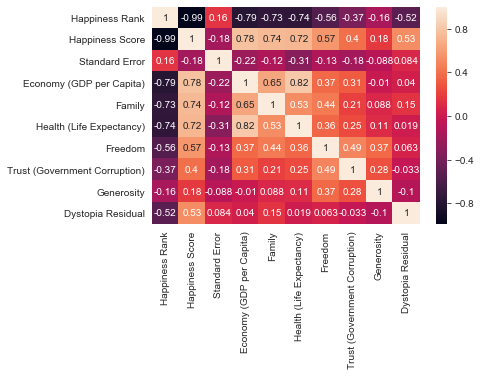

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [37]:
df1 = df.copy()
df1.drop(["Happiness Rank", "Country"], axis=1, inplace=True)

In [38]:
dummies = pd.get_dummies(df1)

In [39]:
dummies.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,1
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,1
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,1
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,1
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0,0


In [40]:
sc = StandardScaler()

X = dummies.drop("Happiness Score", axis=1)
y = dummies["Happiness Score"]

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [41]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   SVM (Linear Kernel)": SVR(kernel="linear"),
}

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   SVM (Linear Kernel) trained.


In [43]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                     Linear Regression
------------------------------------------------------------
Testing Accuracy: 1.00000
Training Accuracy: 1.00000
------------------------------------------------------------


 Linear Regression (L2 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.99991
Training Accuracy: 0.99994
------------------------------------------------------------


 Linear Regression (L1 Regularization)
------------------------------------------------------------
Testing Accuracy: -0.07232
Training Accuracy: 0.00000
------------------------------------------------------------


                   SVM (Linear Kernel)
------------------------------------------------------------
Testing Accuracy: 0.99542
Training Accuracy: 0.99717
------------------------------------------------------------




In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=10))
    print("-----------------------------------------------------")

                     Linear Regression 

[0.99999971 0.99999997 0.9999998  0.99999994 0.99999998 0.99999991
 0.99999969 0.99999975 0.99999995 0.99999983]
-----------------------------------------------------
 Linear Regression (L2 Regularization) 

[0.98920331 0.99892142 0.99861532 0.99514169 0.99941341 0.99904286
 0.99831674 0.99951075 0.97386888 0.99657299]
-----------------------------------------------------
 Linear Regression (L1 Regularization) 

[-2.06857642e-01 -1.52617788e-02 -2.75037788e-01 -1.13273727e+00
 -1.82580412e-02 -5.29827282e-01 -4.84915004e-02 -5.31003501e-04
 -2.92257288e+00 -7.01287796e-02]
-----------------------------------------------------
                   SVM (Linear Kernel) 

[0.96170406 0.99423403 0.96540623 0.98004548 0.99893909 0.99724741
 0.9896013  0.99673999 0.8507072  0.98742604]
-----------------------------------------------------


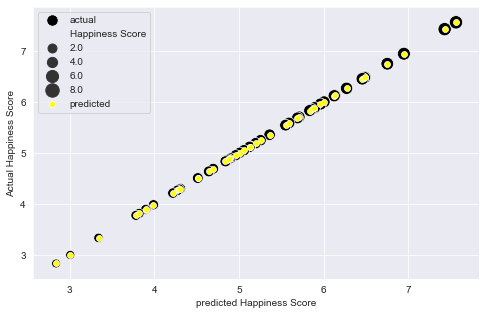

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.scatterplot(y_test, y_test, color="black", size=dummies["Happiness Score"], sizes=(80,180), label= "actual")
sns.scatterplot(lr.predict(X_test) ,y_test, color= "yellow", label="predicted")
plt.ylabel("Actual Happiness Score")
plt.xlabel("predicted Happiness Score")
plt.legend()

Text(0, 0.5, 'Generosity and Dystopian Residual')

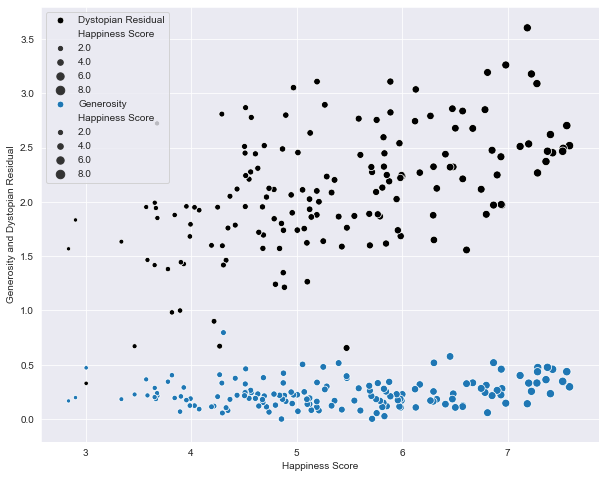

In [79]:
plt.figure(figsize=(10,8))
sns.scatterplot(dummies["Happiness Score"], dummies["Dystopia Residual"], label = "Dystopian Residual",
                color="black", size=dummies["Happiness Score"])
sns.scatterplot(dummies["Happiness Score"], dummies["Generosity"], label = "Generosity",size=dummies["Happiness Score"])
plt.ylabel("Generosity and Dystopian Residual")

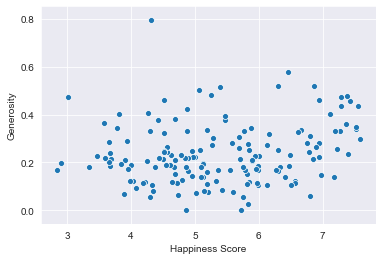

In [54]:
sns.scatterplot(dummies["Happiness Score"], dummies["Generosity"])